---
#**<center>PRÁCTICA 2: MACHINE LEARNING</center>**
##<center>**PREDICCIÓN DE PRECIO DE AUTOMÓVILES USADOS**</center>
---
###**Estudiante:** Pablo Adolfo Jiménez Zabalaga
---

<center><img src="https://www.bbva.com/wp-content/uploads/2019/01/coche-online-internet-ordenador-bbva-1920x1177.jpg" style="float: left; margin-right: 10px;" width="100%"/></center>

---    
##**1. Identificación del problema**
---

<div align="justify"> <font size="3"> Actualmente, el mercado de automóviles es un negocio próspero y de elevado crecimiento debido al volumen de transacciones cada vez mayor. En este sentido, como en toda venta de productos de segunda mano, es necesario realizar una tasación del vehículo antes de poder realizar una comprar o venta. Sin embargo, ésta no es directa y es basada tradicionalmente en la evaluación de activos que se ve afectado en gran medida por subjetividad y carece de adecuada precisión. Por tanto, se genera un
problema para los individuos ajenos a este mercado a la hora de saber cuánto vale un automóvil, ya sea para saber a qué precio venderlo o comprarlo.
Dada esta problemática, en este proyecto se analizó un sistema computacional automático de tasación de vehículos de segunda mano que tiene como objetivo entregar el valor de mercado actual del auto, haciendo uso de conjunto de datos reales (19237 datos para el conjunto de datos de entrenamiento y 8245 para el conjunto de datos de prueba).</font></div>

###**1.1. Objetivo**
- <div align="justify">Desarrollar un sistema de predicción de precios de automóviles usados basado en las características de éstos (modelo, año de fabricación, kilometraje, tipo de combustible, tipo de caja de cambios,
etc.), que permita al usuario realizar tasaciones de autos para fines comerciales.</div>

###**1.2. Columnas**
####**Target variable:**
- **Price:** Precio.

####**Integer variables:**
- **ID:** Identificación.
- **Prod. year:** Año de fabricación.
- **Airbags:** Bolsas de aire.

####**Continuous variables:**
- **Cylinders:** Cilindros.

####**Categorical variables:**
- **Levy:** Exacción.
- **Manufacturer:** Fabricante.
- **Model:** Modelo.
- **Category:** Categoría de automóvil.
- **Leather interior:** Interior de cuero.
- **Fuel type:** Tipo de combustible.
- **Engine volume:** Volumen del motor.
- **Mileage:** Kilometraje.
- **Gear box type:** Tipo de caja de cambios.
- **Drive wheels:** Ruedas motrices.
- **Doors:** Número de puertas.
- **Wheel:** Rueda.
- **Color:** Color.

---    
##**2. Importación de datos**
---

In [8]:
#Importación de librerías
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [9]:
#Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [10]:
#Cargar archivo de los datos de entrenamiento desde la unidad local 
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [11]:
#Cargar archivo de los datos de testeo desde la unidad local 
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [12]:
#Importación de datos
df_price_train = pd.read_csv('train.csv')
df_price_test = pd.read_csv('test.csv')

In [13]:
#Tamaño del dataset para entrenamiento
df_price_train.shape

(19237, 18)

In [14]:
#Tamaño del dataset para testeo
df_price_test.shape

(8245, 18)

In [17]:
#Primeras diez filas del dataset para entrenamiento
df_price_train.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [18]:
#Primeras diez filas del dataset para testeo
df_price_test.head(5)

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10,NaN
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10,NaN
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8,NaN
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12,NaN
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0,NaN


---    
##**3. Inspección de datos**
---

### **3.1. Preparación de datos**
Se realiza una revisión general y preparación del dataset para poder continuar con el análisis exploratorio de datos (EDA). Así, se contempla los medidas estadísticas básicas.

In [19]:
#Información del dataset para entrenamiento
df_price_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [20]:
#Información del dataset para testeo
df_price_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8245 non-null   int64  
 1   Levy              8245 non-null   object 
 2   Manufacturer      8245 non-null   object 
 3   Model             8245 non-null   object 
 4   Prod. year        8245 non-null   int64  
 5   Category          8245 non-null   object 
 6   Leather interior  8245 non-null   object 
 7   Fuel type         8245 non-null   object 
 8   Engine volume     8245 non-null   object 
 9   Mileage           8245 non-null   object 
 10  Cylinders         8245 non-null   int64  
 11  Gear box type     8245 non-null   object 
 12  Drive wheels      8245 non-null   object 
 13  Doors             8245 non-null   object 
 14  Wheel             8245 non-null   object 
 15  Color             8245 non-null   object 
 16  Airbags           8245 non-null   int64  


In [21]:
#Verificación de datos faltantes del dataset para entrenamiento
df_price_train.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [22]:
#Verificación de datos faltantes del dataset para testeo
df_price_test.isnull().sum()

ID                     0
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
dtype: int64

In [23]:
#Concatenación de los dataset de entrenamiento y testeo
df_price=pd.concat([df_price_train,df_price_test])

In [24]:
#Información del dataset
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27482 entries, 0 to 8244
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                27482 non-null  int64  
 1   Price             19237 non-null  float64
 2   Levy              27482 non-null  object 
 3   Manufacturer      27482 non-null  object 
 4   Model             27482 non-null  object 
 5   Prod. year        27482 non-null  int64  
 6   Category          27482 non-null  object 
 7   Leather interior  27482 non-null  object 
 8   Fuel type         27482 non-null  object 
 9   Engine volume     27482 non-null  object 
 10  Mileage           27482 non-null  object 
 11  Cylinders         27482 non-null  float64
 12  Gear box type     27482 non-null  object 
 13  Drive wheels      27482 non-null  object 
 14  Doors             27482 non-null  object 
 15  Wheel             27482 non-null  object 
 16  Color             27482 non-null  object 

In [25]:
#Columnas del dataset
df_price.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [27]:
#Datos estadísticos básicos del dataset
df_price.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,2.748200e+04,1.923700e+04,27482.000000,27482.000000,27482.000000
mean,4.557857e+07,1.855593e+04,2010.912452,4.593734,6.563569
std,9.244972e+05,1.905813e+05,5.632865,1.413918,4.329256
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569808e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577207e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580197e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,127.000000,16.000000


In [29]:
#Verifación de que el número de identificación (ID) sea único 
print("El número de IDs únicos es",df_price.ID.nunique(), "del total de datos de", df_price.shape[0])

El número de IDs únicos es 26886 del total de datos de 27482


In [30]:
#Verifación de los valores más altos de precio del dataframe
df_price['Price'].nlargest(10)

16983    26307500.0
8541       872946.0
1225       627220.0
5008       308906.0
9367       297930.0
14839      297930.0
7749       288521.0
10759      260296.0
5840       254024.0
15283      250574.0
Name: Price, dtype: float64

In [31]:
#Verificación de datos faltantes del dataset
df_price.isnull().sum()

ID                     0
Price               8245
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [32]:
#Verificación de datos únicos de los atributos
df_price.nunique()

ID                  26886
Price                2315
Levy                  635
Manufacturer           68
Model                1981
Prod. year             59
Category               11
Leather interior        2
Fuel type               7
Engine volume         112
Mileage              9977
Cylinders              16
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

#### **3.1.1. Observaciones**
- La columna de precios parece estar sesgada con posibles valores atípicos. 
El precio mínimo de 1 dólar parece poco realista. Además, que los automóviles con precios mayores a 300000 son igualmente poco comunes.
- Están enlistados automóviles fabricados entre 1939 y 2020.
- Los motores de cuatro cilindros aparentemente son los más comunes.
- Existen IDs duplicados. Se verificará si contienen la misma información y se eliminarán los duplicados.
- No existen datos de precio del conjunto de datos para testeo.

In [33]:
#Reemplazo de datos extremos del dataset
x=[]
for i in df_price['Price']:
  if i>300000:
    x.append(290000)
  else:
    x.append(i)
df_price['Price']=x

In [34]:
#Verificamos las entradas duplicadas
df_price[df_price.duplicated(subset=['ID'])].head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840.0,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781.0,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503.0,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12


In [35]:
#Eliminación de entradas duplicadas
df_price=df_price.drop_duplicates(subset=['ID'],)

In [37]:
#Verifación de que el número de identificación (ID) sea único 
print("El número de IDs únicos es",df_price.ID.nunique(), "del total de datos de", df_price.shape[0])

El número de IDs únicos es 26886 del total de datos de 26886


#### **3.1.2. Transformación de la variable de kilometraje**
La variable de kilometraje (Mileage) está en formato de objeto y tiene las unidades (km) que realmente no será útil en el análisis. Por tanto, se realizará una transformación de este atributo.

In [38]:
#Transformación de la variable de kilometraje
df_price['Mileage']=df_price['Mileage'].str.replace('km',' ')
df_price['Mileage']=df_price['Mileage'].astype(int)
xx=[]
for i in df_price['Mileage']:
  if i>1400000:
    xx.append(1500000)
  else:
    xx.append(i)
df_price['Mileage']=xx

#### **3.1.3. Transformación de la variable de exacción**
La variable de exacción (Levy) tiene valores nulos anotados con el símbolo '-'. Por tanto, se realizará una transformación de este atributo.

In [39]:
#Transformación de la variable de exacción
df_price['Levy']=df_price['Levy'].replace('-', np.nan)
#Método de llenado para valores nulos a través del último valor no nulo observado hacia adelante
df_price['Levy']=df_price['Levy'].fillna(method='ffill')
#Método de llenado para valores nulos a través del último valor no nulo observado hacia atrás
df_price['Levy']=df_price['Levy'].fillna(method='bfill')
df_price['Levy']=df_price['Levy'].astype(int)

#### **3.1.4. Transformación de la variable de volumen de motor**
La variable de volumen de motor (Engine Volume) tiene 112 categorías, por tanto, solamente se dividará esta columna en el volumen propiamente del motor (double) y se añadirá una columna que clasificará el tipor de motor en dos categorías (Turbo o sin turbo).

In [40]:
#Transformación de la variable de volumen de motor
a=[]
b=[]
for i in df_price['Engine volume']:
  i=i.split(' ')
  if len(i)==2:
    a.append(i[0])
    b.append(i[1])
  else:
    a.append(i[0])
    b.append('non turbo')
df_price['Engine volume']=a
df_price['Engine type']=b

#### **3.1.5. Transformación de la variable de número de puertas**
La variable de número de puertas (Doors) tiene tres categorías distintas, pero problamente el valor de 4 de mayo se refiere a 4 puertas y el valor de 2 de marzo a 2 puertas. De esta manera, se reemplazará los valores mencionados respectivamente.

In [41]:
#Transformación de la variable de número de puertas
df_price['Doors']=df_price.Doors.replace(to_replace={'04-May':4,'02-Mar':2,'>5':6})
df_price['Doors']=df_price['Doors'].astype('int')

#### **3.1.6. Conversión de variables de tipo objeto a tipo numérico**

In [42]:
x=list(df_price.select_dtypes(['object']).columns)
x

['Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Gear box type',
 'Drive wheels',
 'Wheel',
 'Color',
 'Engine type']

In [43]:
for i in x:
  from sklearn.preprocessing import LabelEncoder
  le = LabelEncoder()
  df_price[i] = le.fit_transform(df_price[i])
  df_price[i]=df_price[i]+1

In [60]:
temp = df_price.groupby(['Mileage']).agg({
'Mileage':['count','sum','mean','median','std'],
'Model':['count','mean','sum','median','std'],
'Prod. year':['count','mean','sum','median','std']})
temp.columns = ['_condd_'.join(x) for x in temp.columns]
df_price = pd.merge(df_price,temp,on=['Mileage'],how='left')

In [61]:
#Primeras diez filas del dataset después del tratamiento y limpieza
df_price.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Model_condd_count,Model_condd_mean,Model_condd_sum,Model_condd_median,Model_condd_std,Prod. year_condd_count,Prod. year_condd_mean,Prod. year_condd_sum,Prod. year_condd_median,Prod. year_condd_std
0,45654403,13328.0,1399,34,1548,2010,5,2,3,41,...,21,1548.0000,32508,1548.0,0.000000,21,2010.000,42210,2010.0,0.000000
1,44731507,16621.0,1018,9,817,2011,5,1,6,35,...,32,956.1875,30598,895.0,482.020441,32,2008.625,64276,2010.0,4.527693
2,45774419,8467.0,1018,23,850,2006,4,1,6,15,...,250,1074.1400,268535,1172.0,579.277053,250,2003.948,500987,2004.0,5.444987
3,45769185,3607.0,862,17,820,2011,5,2,3,29,...,10,820.0000,8200,820.0,0.000000,10,2011.000,20110,2011.0,0.000000
4,45809263,11726.0,446,23,850,2014,4,2,6,15,...,1,850.0000,850,850.0,NaN,1,2014.000,2014,2014.0,NaN


### **3.2. Separación en datasets de entranamiento y testeo**
Finalmente, en esta etapa, se realiza una separación nuevamente en datos de entrenamiento y de testeo.

In [62]:
#Separación en datasets de entrenamiento y de testeo
df_price_train = df_price[df_price['Price'].isnull()==False]
df_price_test = df_price[df_price['Price'].isnull()==True]
del df_price_test['Price']

In [63]:
#Tamaño del dataset final para entrenamiento
df_price_train.shape

(18924, 34)

In [64]:
#Tamaño del dataset final para testeo
df_price_test.shape

(7962, 33)

---    
##**4. Análisis Exploratorio de Datos (EDA)**
---

### **4.1. Análisis Univariable**

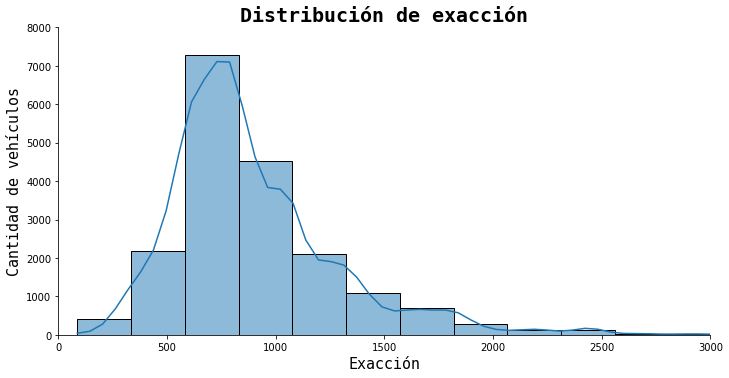

In [77]:
#Distribución de exacción
sns.displot(df_price_train['Levy'], bins=47, kde=True, height=5, aspect=2)
plt.title('Distribución de exacción', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Exacción', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylim([0,8000])
plt.xlim([0,3000])
plt.tick_params(labelsize=10)
plt.show()

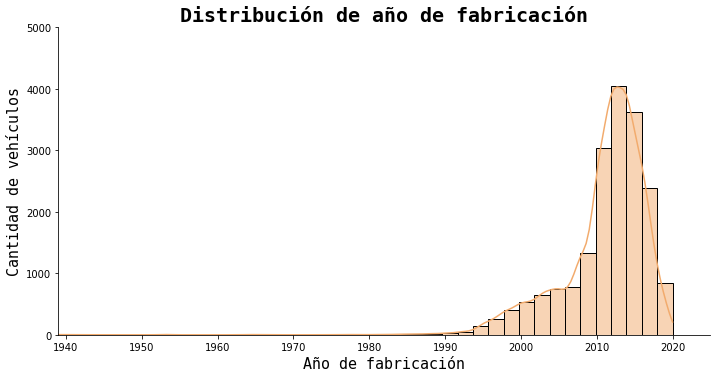

In [78]:
#Distribución de año de fabricación
sns.displot(df_price_train['Prod. year'], color='#F2AB6D', bins=40, kde=True, height=5, aspect=2)
plt.title('Distribución de año de fabricación', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Año de fabricación', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylim([0,5000])
plt.xlim([1939,2025])
plt.tick_params(labelsize=10)
plt.show()

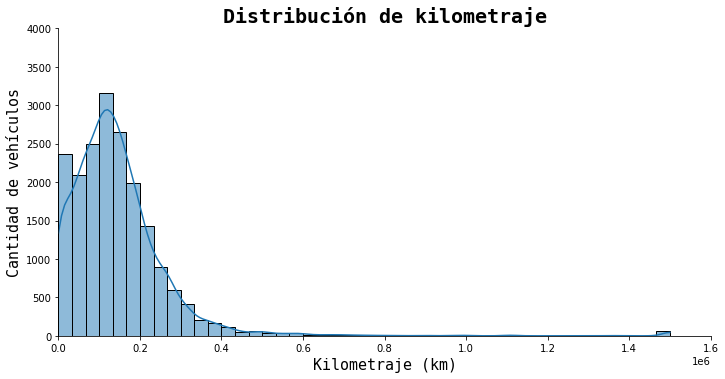

In [79]:
#Distribución de kilometraje
sns.displot(df_price_train['Mileage'], bins=45, kde=True, height=5, aspect=2)
plt.title('Distribución de kilometraje', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Kilometraje (km)', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylim([0,4000])
plt.xlim([0,1600000])
plt.tick_params(labelsize=10)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


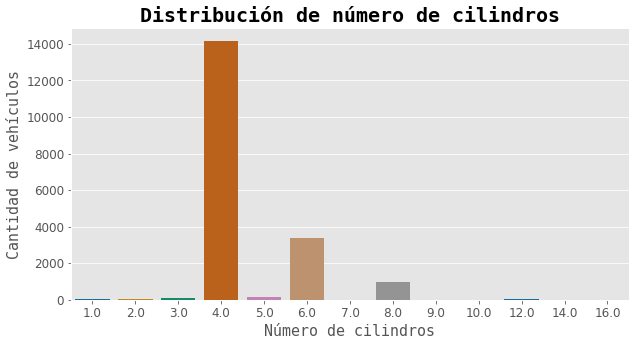

In [81]:
#Distribución de número de cilindros
cylinder = df_price_train['Cylinders'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(cylinder.index, cylinder.values, palette='colorblind')
plt.title('Distribución de número de cilindros', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Número de cilindros', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


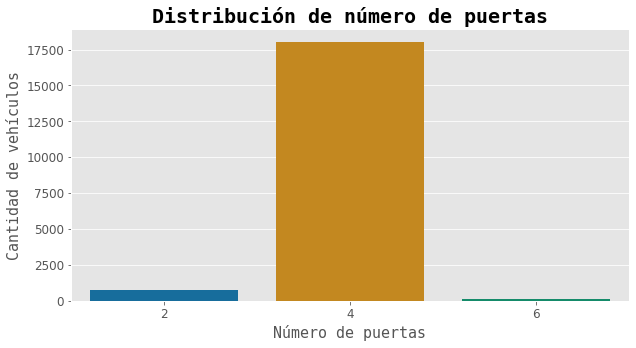

In [82]:
#Distribución de número de puertas
door = df_price_train['Doors'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(door.index, door.values, palette='colorblind')
plt.title('Distribución de número de puertas', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Número de puertas', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


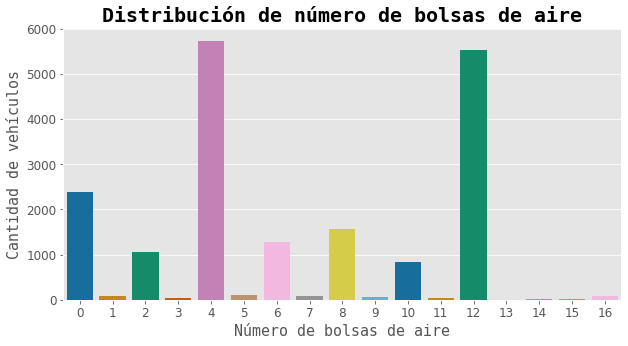

In [83]:
#Distribución de número de bolsas de aire
airbag = df_price_train['Airbags'].value_counts()

plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(airbag.index, airbag.values, palette='colorblind')
plt.title('Distribución de número de bolsas de aire', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Número de bolsas de aire', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Cantidad de vehículos', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.show()

### **4.2. Análisis Bi-variable**

In [85]:
#Reporte rápido a través del uso de Pandas Profiling
from pandas_profiling import ProfileReport
profile = ProfileReport(df_price_train, title="Car Price Prediction EDA", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **4.3. Análisis Multivariable**


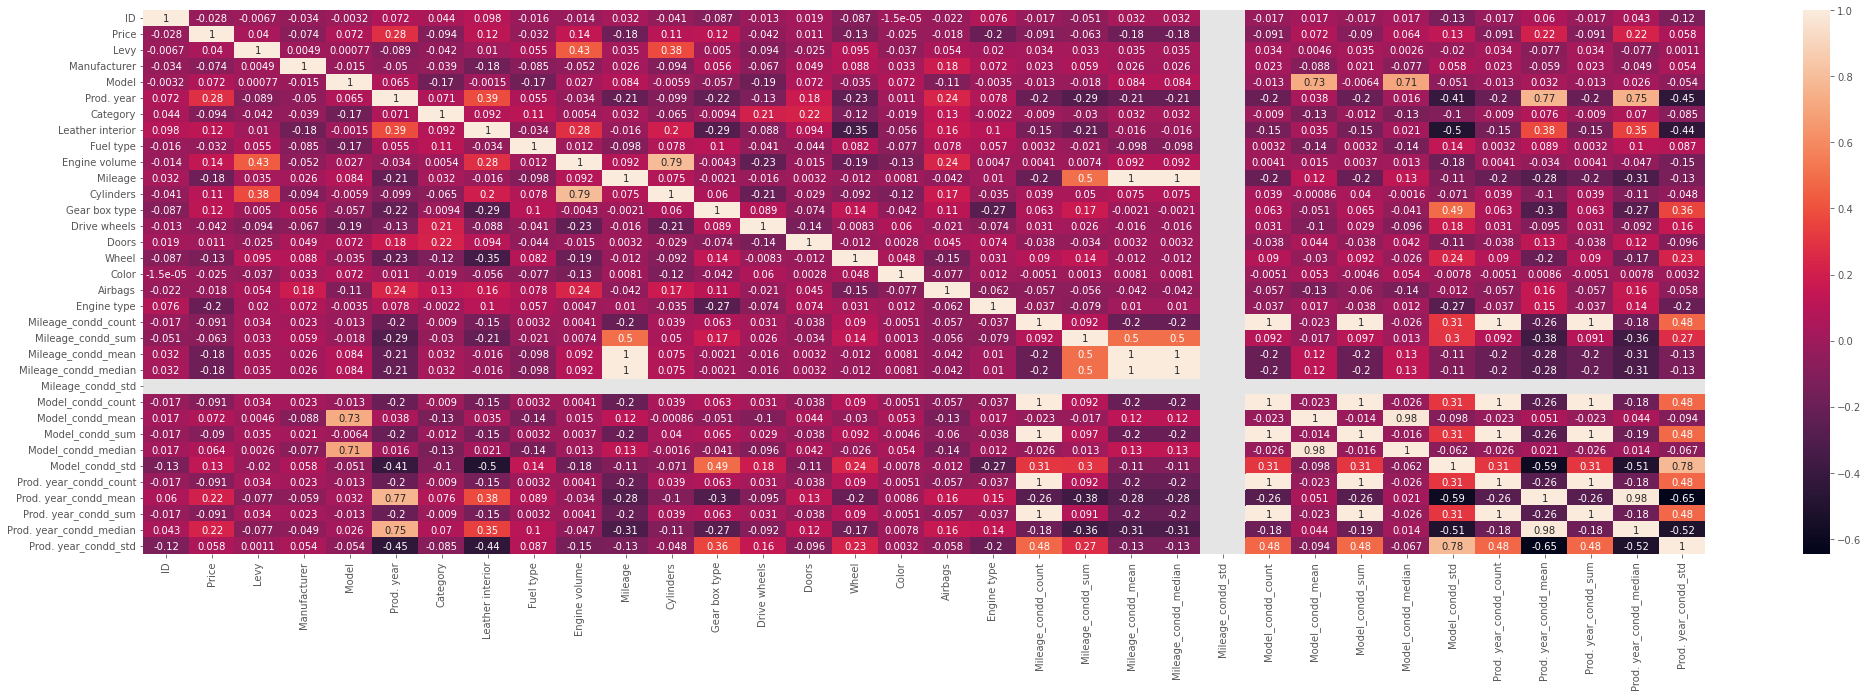

In [89]:
#Mapa de calor de correlaciones
plt.figure(figsize=(35,10))
sns.heatmap(df_price_train.corr(), annot= True)

In [90]:
#Pairplot
sns.pairplot(df_price_train,diag_kind='kde')

Error in callback <function flush_figures at 0x7f4ced0c83b0> (for post_execute):


KeyboardInterrupt: ignored

### **4.4. Manipulacion de los datos**

In [67]:
#Primeras diez filas del dataset para entrenamiento
df_price_train.head(4)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Model_condd_count,Model_condd_mean,Model_condd_sum,Model_condd_median,Model_condd_std,Prod. year_condd_count,Prod. year_condd_mean,Prod. year_condd_sum,Prod. year_condd_median,Prod. year_condd_std
0,45654403,13328.0,1399,34,1548,2010,5,2,3,41,...,21,1548.0000,32508,1548.0,0.000000,21,2010.000,42210,2010.0,0.000000
1,44731507,16621.0,1018,9,817,2011,5,1,6,35,...,32,956.1875,30598,895.0,482.020441,32,2008.625,64276,2010.0,4.527693
2,45774419,8467.0,1018,23,850,2006,4,1,6,15,...,250,1074.1400,268535,1172.0,579.277053,250,2003.948,500987,2004.0,5.444987
3,45769185,3607.0,862,17,820,2011,5,2,3,29,...,10,820.0000,8200,820.0,0.000000,10,2011.000,20110,2011.0,0.000000


In [68]:
#Dividimos nuesros datos train, validation and test
X = df_price_train.drop('Price', axis = 1)
y = np.log1p(df_price_train['Price'])

X_test = df_price_test

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0, test_size = 0.3)

#**Light GBM**

<div align="justify"> <font size="3"> Se seleccionó este algoritmo, debido a que Light GBM es un marco que implementa el algoritmo Gradient Boosting Decision Tree (GBDT), es decir que se basa en algoritmo basado en árboles de decisión. Entre sus principales ventajas se puede enumerar que posee mayor velocidad de entrenamiento (LightGBM es casi 10 veces más rápido que XGBoost), menor consumo de memoria, mejor precisión y soporte distribuido para el procesamiento rápido de Big Data.</font></div>

---    
##**5. Modelado ML**
---

In [91]:
from lightgbm import LGBMRegressor
lgbm = LGBMRegressor(random_state = 0)
lgbm.fit(X_train, y_train)

LGBMRegressor(random_state=0)

In [92]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 0,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

---    
##**6. Evaluación del modelo**
---

In [93]:
print("Train Score:", lgbm.score(X_train,y_train))
print("Validation Score:", lgbm.score(X_valid,y_valid))

Train Score: 0.7507527150048934
Validation Score: 0.6302674066731768


---    
##**7. Ajuste de parámetros**
---

- num_leaves: Número de hojas en un árbol; por defecto=31.

- learning_rate: Tasa de aprendizaje; por defecto=0.1.

- n_estimators: Número de árboles para encajar; por defecto=100.

In [94]:
#Creación de modelo básico
lgbm_ = LGBMRegressor(num_leaves = 600, learning_rate = 0.01, n_estimators=500)

#Impresión de parametros disponibles
lgbm_.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'num_leaves': 600,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

### **7.1. Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'num_leaves': [300,500,700],
    'learning_rate': [0.01,0.03,0.05],
    'n_estimators': [600,800,1000]
}
clf_grid_lgbm = GridSearchCV(lgbm_,model_params, cv = 5, verbose=10)
clf_grid_lgbm.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START learning_rate=0.01, n_estimators=600, num_leaves=300.......
[CV 1/5; 1/27] END learning_rate=0.01, n_estimators=600, num_leaves=300;, score=0.626 total time=  12.7s
[CV 2/5; 1/27] START learning_rate=0.01, n_estimators=600, num_leaves=300.......
[CV 2/5; 1/27] END learning_rate=0.01, n_estimators=600, num_leaves=300;, score=0.611 total time=   7.5s
[CV 3/5; 1/27] START learning_rate=0.01, n_estimators=600, num_leaves=300.......
[CV 3/5; 1/27] END learning_rate=0.01, n_estimators=600, num_leaves=300;, score=0.687 total time=   7.4s
[CV 4/5; 1/27] START learning_rate=0.01, n_estimators=600, num_leaves=300.......
[CV 4/5; 1/27] END learning_rate=0.01, n_estimators=600, num_leaves=300;, score=0.653 total time=   7.4s
[CV 5/5; 1/27] START learning_rate=0.01, n_estimators=600, num_leaves=300.......
[CV 5/5; 1/27] END learning_rate=0.01, n_estimators=600, num_leaves=300;, score=0.645 total time=   7.4s
[CV 1/5;

GridSearchCV(cv=5,
             estimator=LGBMRegressor(learning_rate=0.01, n_estimators=500,
                                     num_leaves=600),
             param_grid={'learning_rate': [0.01, 0.03, 0.05],
                         'n_estimators': [600, 800, 1000],
                         'num_leaves': [300, 500, 700]},
             verbose=10)

In [ ]:
clf_grid_lgbm.best_estimator_.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 300,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

---    
##**8. Métricas**
---

In [95]:
#Impresión de score 
clf_lgbm_best = LGBMRegressor(num_leaves = 300, learning_rate = 0.01, n_estimators=1000)
clf_lgbm_best.fit(X_train,y_train)
print("Train Score Grid Search:", clf_lgbm_best.score(X_train,y_train))
print("Validation Grid Search Score:", clf_lgbm_best.score(X_valid,y_valid))

Train Score Grid Search: 0.9620190346422746
Validation Grid Search Score: 0.690796860120065


In [96]:
#Error Mean Squared Log Error (MSLE) - Error cuadrático logarítmico medio
from sklearn.metrics import mean_squared_log_error
print("MSLE - Train:", mean_squared_log_error(y_train,clf_lgbm_best.predict(X_train)))
print("MSLE - Validation:", mean_squared_log_error(y_valid,clf_lgbm_best.predict(X_valid)))

MSLE - Train: 0.002331659500726176
MSLE - Validation: 0.013626758641778466


#**XGBoost**

<div align="justify"> <font size="3">El algoritmo XG Boost (Extreme Gradient Boosting) es una técnica de aprendizaje supervisado, basada en árboles de decisión y que es considerada el estado del arte en la evolución de estos algoritmos. En este sentido, fue seleccionadodebido a que puede manejar grandes bases de datos con múltiples variables, valores perdidos, con resultados precisos y excelente velocidad de ejecución.</font></div>

---    
##**5. Modelado ML**
---

In [97]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state = 0)
xgb.fit(X_train, y_train)

[03:15:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [98]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

---    
##**6. Evaluación del modelo**
---

In [99]:
#Impresión de scores
print("Train Score:", xgb.score(X_train,y_train))
print("Validation Score:", xgb.score(X_valid,y_valid))

Train Score: 0.5482958865178857
Validation Score: 0.49636973201046486


---    
##**7. Ajuste de parámetros**
---

- learning_rate: Tasa de aprendizaje; por defecto=0.1.

- n_estimators: Número de árboles para encajar; por defecto=100.

- max_depth: Número de hojas en un árbol; por defecto=3.

In [100]:
#Creación de modelo básico
clf_xgb_ = XGBRegressor(random_state = 0)

#Impresión de parámetros disponibles
clf_xgb_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

### **7.1. Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'learning_rate': [0.1,0.2],
    'max_depth': [5,7],
    'n_estimators':[1000,1500]
}
clf_grid_xgb = GridSearchCV(clf_xgb_,model_params, cv = 5, verbose=10)
clf_grid_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START learning_rate=0.1, max_depth=5, n_estimators=1000...........
[23:46:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5; 1/8] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.591 total time=  11.2s
[CV 2/5; 1/8] START learning_rate=0.1, max_depth=5, n_estimators=1000...........
[23:46:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5; 1/8] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.590 total time=  12.9s
[CV 3/5; 1/8] START learning_rate=0.1, max_depth=5, n_estimators=1000...........
[23:47:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5; 1/8] END learning_rate=0.1, max_depth=5, n_estimators=1000;, score=0.653 total time=  10.6s
[CV 4/5; 1/8]

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.1, 0.2], 'max_depth': [5, 7],
                         'n_estimators': [1000, 1500]},
             verbose=10)

In [ ]:
clf_grid_xgb.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 1500,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

---    
##**8. Métricas**
---

In [101]:
#Impresión de score
clf_xgb_best = XGBRegressor(learning_rate = 0.1, max_depth = 7, n_estimators = 1500)
clf_xgb_best.fit(X_train,y_train)
print("Train Score Grid Search:", clf_xgb_best.score(X_train,y_train))
print("Validation Grid Search Score:", clf_xgb_best.score(X_valid,y_valid))

[03:21:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train Score Grid Search: 0.9912899440614478
Validation Grid Search Score: 0.6798574311499823


In [102]:
#Error Mean Squared Log Error (MSLE) - Error cuadrático logarítmico medio
from sklearn.metrics import mean_squared_log_error
print("MSLE - Train:", mean_squared_log_error(y_train,clf_xgb_best.predict(X_train)))
print("MSLE - Validation:", mean_squared_log_error(y_valid,clf_xgb_best.predict(X_valid)))

MSLE - Train: 0.00037110987121600564
MSLE - Validation: 0.013878542819820424


#**Random Forest**

<div align="justify"> <font size="3">El algoritmo Random Forest es una técnica de aprendizaje supervisado que genera múltiples árboles de decisión sobre un conjunto de datos de entrenamiento. Así, los resultados obtenidos se combinan a fin de obtener un modelo único más robusto en comparación con los resultados de cada árbol por separado. En este sentido, este algoritmo fue seleccionado debido a que puede utilizarse para predicción, posee simpleza para entrenamiento en comparación con técnicas más complejas, de desempeño muy eficiente y mantiene su precisión con proporciones grandes de datos perdidos.</font></div>

---    
##**5. Modelado ML**
---

In [113]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_valid = X_valid.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [114]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

---    
##**6. Evaluación del modelo**
---

In [115]:
#Impresión de scores
print("Train Score:", rf.score(X_train,y_train))
print("Validation Score:", rf.score(X_valid,y_valid))

Train Score: 0.9540076472204122
Validation Score: 0.6732962028128698


---    
##**7. Ajuste de parámetros**
---

- random_state: Controla tanto la aleatoriedad de bootstrapping de las muestras utilizadas al construir árboles como el muestreo de las características a tener en cuenta al buscar la mejor división en cada nodo; por defecto=None.

- max_depth: Profundidad máxima del árbol; por defecto=None.

- n_estimators: Número de árboles para encajar; por defecto=100.

In [116]:
#Creación de modelo básico
clf_rf_ = RandomForestRegressor(random_state = 100 , max_depth = 40 , n_estimators = 500)

#Impresión de parámetros disponibles
clf_rf_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 40,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 100,
 'verbose': 0,
 'warm_start': False}

### **7.1. Grid Search**

In [ ]:
from sklearn.model_selection import GridSearchCV
model_params = {
    'random_state': [100,200],
    'max_depth': [20,50],
    'n_estimators': [500,600]
}
clf_grid_rf = GridSearchCV(clf_rf_,model_params, cv = 5, verbose=10)
clf_grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5; 1/8] START max_depth=20, n_estimators=500, random_state=100............
[CV 1/5; 1/8] END max_depth=20, n_estimators=500, random_state=100;, score=0.625 total time=  30.1s
[CV 2/5; 1/8] START max_depth=20, n_estimators=500, random_state=100............
[CV 2/5; 1/8] END max_depth=20, n_estimators=500, random_state=100;, score=0.613 total time=  29.9s
[CV 3/5; 1/8] START max_depth=20, n_estimators=500, random_state=100............
[CV 3/5; 1/8] END max_depth=20, n_estimators=500, random_state=100;, score=0.684 total time=  29.8s
[CV 4/5; 1/8] START max_depth=20, n_estimators=500, random_state=100............
[CV 4/5; 1/8] END max_depth=20, n_estimators=500, random_state=100;, score=0.651 total time=  30.0s
[CV 5/5; 1/8] START max_depth=20, n_estimators=500, random_state=100............
[CV 5/5; 1/8] END max_depth=20, n_estimators=500, random_state=100;, score=0.656 total time=  29.7s
[CV 1/5; 2/8] START max_depth=20, n

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=40, n_estimators=500,
                                             random_state=100),
             param_grid={'max_depth': [20, 50], 'n_estimators': [500, 600],
                         'random_state': [100, 200]},
             verbose=10)

In [ ]:
clf_grid_rf.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 50,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 200,
 'verbose': 0,
 'warm_start': False}

---    
##**8. Métricas**
---

In [118]:
#Impresión de score
clf_rf_best = RandomForestRegressor(random_state = 200 , max_depth = 50 , n_estimators = 500)
clf_rf_best.fit(X_train,y_train)
print("Train Score Grid Search:", clf_rf_best.score(X_train,y_train))
print("Validation Grid Search Score:", clf_rf_best.score(X_valid,y_valid))

Train Score Grid Search: 0.9560920100999719
Validation Grid Search Score: 0.6741186333625024


In [119]:
#Error Mean Squared Log Error (MSLE) - Error cuadrático logarítmico medio
from sklearn.metrics import mean_squared_log_error
print("MSLE - Train:", mean_squared_log_error(y_train,clf_rf_best.predict(X_train)))
print("MSLE - Validation:", mean_squared_log_error(y_valid,clf_rf_best.predict(X_valid)))

MSLE - Train: 0.0025767646984534622
MSLE - Validation: 0.014112942774809093


---    
##**9. Conclusiones**
---

<div align="justify"> <font size="3"> Al ser el mercado de venta de autos usados un negocio de alto crecimiento nacional y mundial, es fundamental la estimación del precio de compra/venta de un vehículo. En este trabajo, se desarrolló y probó tres sistemas de aprendizaje automático para predecir esta variable. Así, la regresión del algoritmo de Light GBM, que obtuvo el mejor resultado, mostró un score de 69.08% y un MSLE de 0.0136 en validación. Por otro lado, el algoritmo XGBoost alcanzó valores de 67.99% y 0.0136 en score y MSLE en validación, respectivamente. Finalmente, el algoritmo de Random Forest logró en la validación un score de 67.41% y un MSLE de 0.0141.
Se demostró que las técnicas de Light GBM, XGBoost y Random Forest fueron útiles en la predicción del precio de automóviles usados de forma automática.</font></div>